<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [2]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target)

In [4]:
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train)
results = model.fit()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [5]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     64.15
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           3.56e-83
Time:                        16:19:38   Log-Likelihood:                -1061.2
No. Observations:                 354   AIC:                             2150.
Df Residuals:                     340   BIC:                             2205.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3965      6.361      7.294      0.000      33.884      58.909
CRIM          -0.0985      0.044     -2.259      0.025      -0.184      -0.013
ZN             0.0608      0.019      3.279      0.001       0.024       0.097
INDUS          0.0592      0.077      0.770      0.442      -0.092       0.210
CHAS           2.4396      0.981      2.488      0.013       0.511       4.368
NOX          -21.4700      4.697     -4.571      0.000     -30.708     -12.232
RM             2.7958      0.521      5.364      0.000       1.771       3.821
AGE            0.0036      0.017      0.216      0.829      -0.029       0.036
DIS           -1.5163      0.257     -5.892      0.000      -2.022      -1.010
RAD            0.3075      0.087      3.553      0.000       0.137       0.478
TAX           -0.0113      0.005     -2.283      0.023      -0.021      -0.002
PTRATIO       -1.0055      0.171     -5.873      0.000      -1.342      -0.669
B              0.0065      0.003      1.881      0.061      -0.000       0.013
LSTAT         -0.5688      0.062     -9.190      0.000      -0.691      -0.447
==============================================================================
Omnibus:                      136.364   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.275
Skew:                           1.642   Prob(JB):                    2.95e-123
Kurtosis:                       8.241   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
X_train.shape

(354, 13)

In [7]:
X_test.shape

(152, 13)

In [8]:
predictions = results.predict(sm.add_constant(X_test))

In [9]:
from sklearn.metrics import *

In [10]:
r2_score(y_test, predictions)

0.7836295385076304

In [11]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.7103879080674731
0.7836295385076281


### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [12]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
X.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [14]:
X.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [15]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
#There doesn't seem to have any issues with the data

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [18]:
X.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [19]:
combined = X.merge(y, left_index=True, right_index=True)

In [20]:
combined.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
combined.rename(index=str, columns={0: 'MEDV'}, inplace=True)

In [22]:
combined.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


(14.0, 0.0)

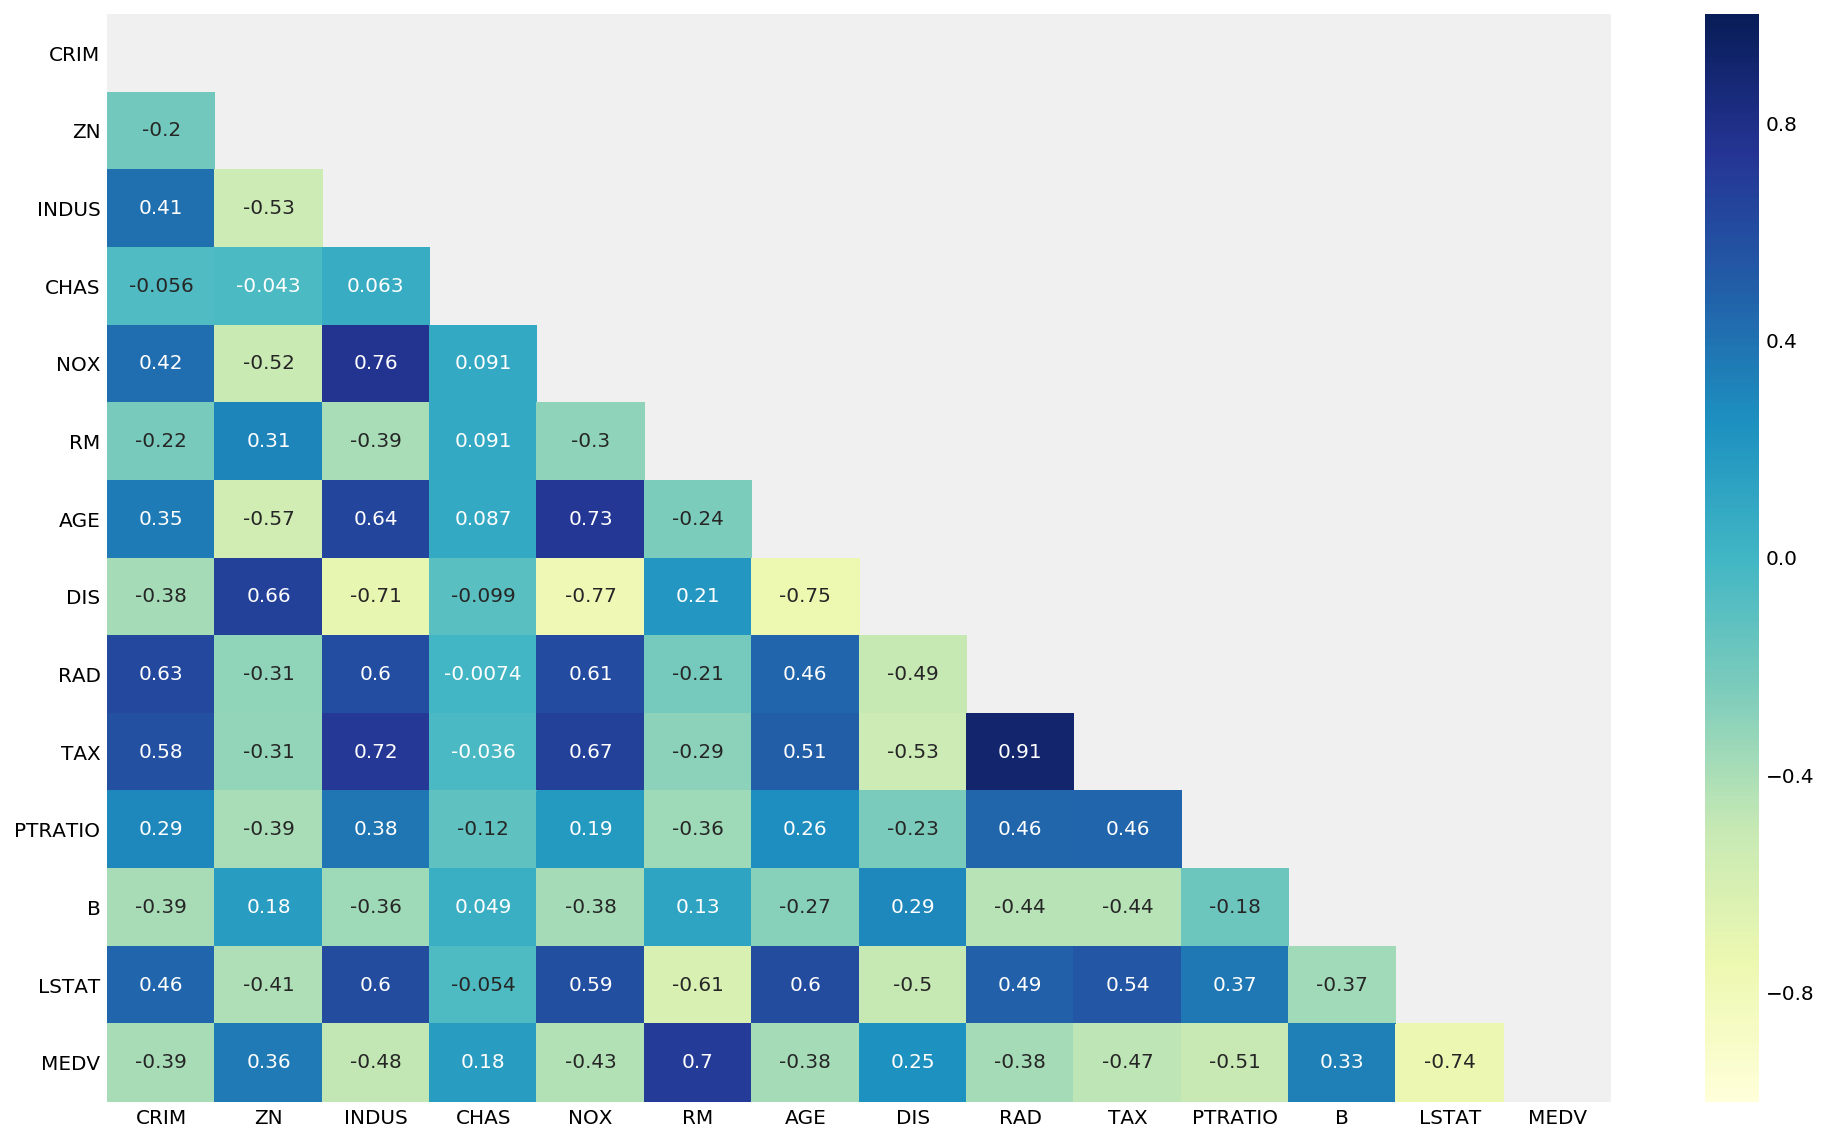

In [26]:
plt.figure(figsize = (15,10))
mask = np.zeros(combined.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
ax = sns.heatmap(combined.corr(),mask=mask ,vmin = -1, vmax = 1, cmap="YlGnBu", center = 0, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [34]:
combined.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [35]:
features = ['LSTAT','RM','PTRATIO']

In [36]:
X = combined[features]
y = pd.DataFrame(boston.target)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
cross_val_score(lr, X_train, y_train).mean()


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6800909425657196

In [41]:
lr.score(X_test, y_test)


0.6478191977576064

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

### 70-30 

In [42]:
X_70_30_train, X_70_30_test, y_70_30_train, y_70_30_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [43]:
lr = LinearRegression()

In [45]:
model = lr.fit(X_70_30_train, y_70_30_train)

In [46]:
predictions = model.predict(X)

In [47]:
cross_val_score(lr, X_70_30_train, y_70_30_train).mean()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.669462493717265

In [48]:
lr.score(X_70_30_test, y_70_30_test)

0.6509041568614722

### 90-10 

In [51]:
X_90_10_train, X_90_10_test, y_90_10_train, y_90_10_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [52]:
lr = LinearRegression()

In [53]:
model = lr.fit(X_90_10_train, y_90_10_train)

In [54]:
predictions = model.predict(X)

In [55]:
cross_val_score(lr, X_90_10_train, y_90_10_train).mean()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6633834228182727

In [56]:
lr.score(X_90_10_test, y_90_10_test)

0.7452159446021683

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

### 50/50

#### k = 5

In [63]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.6844089460670222

#### k = 6

In [64]:
cross_val_score(lr, X_train, y_train, cv=6).mean()

0.6802462906454929

#### k = 7

In [65]:
cross_val_score(lr, X_train, y_train, cv=7).mean()

0.691603262511277

#### k = 8

In [66]:
cross_val_score(lr, X_train, y_train, cv=8).mean()

0.6750272523063239

#### k = 9

In [67]:
cross_val_score(lr, X_train, y_train, cv=9).mean()

0.7001160462655937

#### k = 10

In [68]:
cross_val_score(lr, X_train, y_train, cv=10).mean()

0.6858971993987664

### 70/30

#### k = 5

In [76]:
cross_val_score(lr, X_70_30_train, y_70_30_train, cv=5).mean()

0.651401332264547

#### k = 6

In [77]:
cross_val_score(lr, X_70_30_train, y_70_30_train, cv=6).mean()

0.6652418091440974

#### k = 7

In [78]:
cross_val_score(lr, X_70_30_train, y_70_30_train, cv=7).mean()

0.6690106551742476

#### k = 8

In [79]:
cross_val_score(lr, X_70_30_train, y_70_30_train, cv=8).mean()

0.6728264041538885

#### k = 9

In [80]:
cross_val_score(lr, X_70_30_train, y_70_30_train, cv=9).mean()

0.6572466603838047

#### k = 10

In [75]:
cross_val_score(lr, X_70_30_train, y_70_30_train, cv=10).mean()

0.6475377682499581

### 90/10

#### k = 5

In [81]:
cross_val_score(lr, X_90_10_train, y_90_10_train, cv=5).mean()

0.6574727685134195

#### k = 6

In [82]:
cross_val_score(lr, X_90_10_train, y_90_10_train, cv=6).mean()

0.6570719530492065

#### k = 7

In [83]:
cross_val_score(lr, X_90_10_train, y_90_10_train, cv=7).mean()

0.6617216556026738

#### k = 8

In [84]:
cross_val_score(lr, X_90_10_train, y_90_10_train, cv=8).mean()

0.642614578903294

#### k = 9

In [85]:
cross_val_score(lr, X_90_10_train, y_90_10_train, cv=9).mean()

0.6560497155455044

#### k = 10

In [ ]:
cross_val_score(lr, X_90_10_train, y_90_10_train, cv=10).mean()

### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [8]:
# A:

### 5.1) Explain what could be wrong with this approach.

In [9]:
# A:

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [10]:
import patsy

# A: